In [1]:
import bilby
import sys
sys.path.append('/work/williams5/testing-urs/eosinference/nmma_eos/nmma/eos')
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import InterpolatedUnivariateSpline as ius
import seaborn as sns
import bilby
%matplotlib inline
from matplotlib.patches import Rectangle
import matplotlib as mpl

/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/bilby/gw/source.py:2: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [2]:
#Matplotlib Parameters
plt.rcParams['axes.linewidth'] = 1.75

rc_params = {'backend': 'pdf',
             'axes.labelsize': 20,
             'axes.titlesize': 20,
             'font.size': 24,
             'legend.fontsize': 18,
             'xtick.labelsize': 18,
             'ytick.labelsize': 18,
             'font.family': 'serif',
             'mathtext.fontset': 'cm',         # Use Computer Modern math fonts (LaTeX style)
             'mathtext.rm': 'serif',  
             #'font.sans-serif': ['Bitstream Vera Sans'],
             #'font.serif': ['Times New Roman'],
             #'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
             #'text.usetex':False,
             'lines.linewidth': 3
            }

plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update(rc_params)

In [3]:
eos_data = np.loadtxt('/work/williams5/testing-urs/EOS/soft_mrlfmode.dat') ### change as needed
eos_mass = eos_data[:,1]
eos_r = eos_data[:,0]
eos_lambda = eos_data[:,2]
soft_radius_interp = ius(eos_mass, eos_r)
soft_lambda_interp = ius(eos_mass, eos_lambda)

eos_data = np.loadtxt('/work/williams5/testing-urs/EOS/stiff_mrlfmode.dat') ### change as needed

eos_mass = eos_data[:,1]
eos_r = eos_data[:,0]
eos_lambda = eos_data[:,2]
stiff_radius_interp = ius(eos_mass, eos_r)
stiff_lambda_interp = ius(eos_mass, eos_lambda)

/tmp/ipykernel_3358080/2714407636.py:190: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


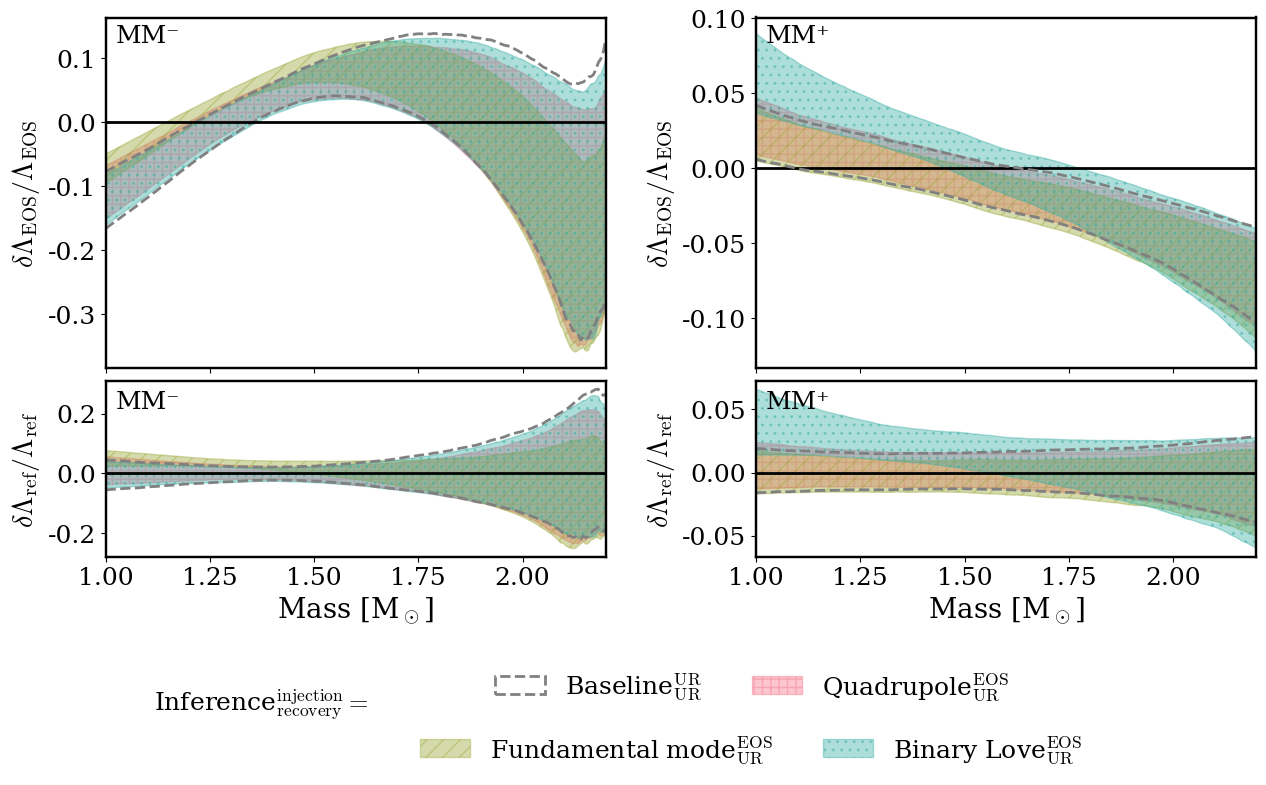

In [4]:
fs = 24
mpl.rcParams.update({
    'axes.linewidth': 1.75,
    'axes.labelsize': fs-4,
    'axes.titlesize': 32,
    'font.size': fs-6,
    'legend.fontsize': fs-6,
    'xtick.labelsize': fs-6,
    'ytick.labelsize': fs-6,
    'lines.linewidth': 3,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
})

# --- File paths and settings ---
basedir = '/work/williams5/testing-urs/bilby/runs/'
dir = '/nuclear_sampling_spectral/nuclear_sampling_spectral_intervals_lambda.npy'

soft_files = {
    "Standard": f'{basedir}standard/soft{dir}',
    "Quadrupole": f'{basedir}sampleQUR/soft{dir}',
    "Fundamental mode": f'{basedir}samplefUR/EOS_UR/soft{dir}',
    "Binary Love": f'{basedir}sampleLaUR/soft{dir}',
}

stiff_files = {
    "Standard": f'{basedir}standard/stiff{dir}',
    "Quadrupole": f'{basedir}sampleQUR/stiff{dir}',
    "Fundamental mode": f'{basedir}samplefUR/EOS_UR/stiff{dir}',
    "Binary Love": f'{basedir}sampleLaUR/stiff{dir}',
}

case_colors = sns.husl_palette(4)
opacity = 0.4
ms = np.linspace(1.0, 2.2, 200)

# --- Legend labels mapping ---
legend_labels = {
    "Standard": r"Baseline$^{\rm UR}_{\rm UR}$",
    "Quadrupole": r"Quadrupole$^{\rm EOS}_{\rm UR}$",
    "Fundamental mode": r"Fundamental mode$^{\rm EOS}_{\rm UR}$",
    "Quadrupole + Fundamental mode": r"Quadrupole$^{\rm EOS}_{\rm UR}$ + Fundamental mode$^{\rm EOS}_{\rm UR}$",
    "Binary Love": r"Binary Love$^{\rm EOS}_{\rm UR}$"
}

# --- Plotting functions ---
def plot_relative_true(ax, ms, intervals, true_lambda, color, style, label=None):
    """Top panel: relative to true Lambda"""
    masses = intervals['masses']
    low, high = intervals['lambda_ci']['90']
    low_interp = np.interp(ms, masses, low)
    high_interp = np.interp(ms, masses, high)
    low_resid = (low_interp - true_lambda) / true_lambda
    high_resid = (high_interp - true_lambda) / true_lambda

    if style == "dashed":
        ax.plot(ms, low_resid, '--', c=color, lw=2, label=label)
        ax.plot(ms, high_resid, '--', c=color, lw=2)
    elif style == "fill":
        ax.fill_between(ms, low_resid, high_resid, color=color, alpha=opacity, hatch='++', label=label)
    elif style == "hatched":
        ax.fill_between(ms, low_resid, high_resid, color=color, alpha=opacity, hatch='//', label=label)
    elif style == "crosshatched":
        ax.fill_between(ms, low_resid, high_resid, color=color, alpha=opacity, hatch='\\\\', label=label)
    elif style == "dotted":
        ax.fill_between(ms, low_resid, high_resid, color=color, alpha=opacity, hatch='..', label=label)

def plot_relative_standard(ax, ms, intervals, ref_lambda, color, style, label=None):
    """Bottom panel: relative to Standard median"""
    masses = intervals['masses']
    low, high = intervals['lambda_ci']['90']
    low_interp = np.interp(ms, masses, low)
    high_interp = np.interp(ms, masses, high)
    low_resid = (low_interp - ref_lambda) / ref_lambda
    high_resid = (high_interp - ref_lambda) / ref_lambda

    if style == "dashed":
        ax.plot(ms, low_resid, '--', c=color, lw=2, label=label)
        ax.plot(ms, high_resid, '--', c=color, lw=2)
    elif style == "fill":
        ax.fill_between(ms, low_resid, high_resid, color=color, alpha=opacity, hatch='++', label=label)
    elif style == "hatched":
        ax.fill_between(ms, low_resid, high_resid, color=color, alpha=opacity, hatch='//', label=label)
    elif style == "crosshatched":
        ax.fill_between(ms, low_resid, high_resid, color=color, alpha=opacity, hatch='\\\\', label=label)
    elif style == "dotted":
        ax.fill_between(ms, low_resid, high_resid, color=color, alpha=opacity, hatch='..', label=label)

def get_standard_median_lambda(intervals, ms_plot):
    masses_native = intervals['masses']
    if 'median' in intervals['lambda_ci']:
        med_lambda = intervals['lambda_ci']['median']
    else:
        low, high = intervals['lambda_ci']['50']
        med_lambda = 0.5 * (low + high)
    return np.interp(ms_plot, masses_native, med_lambda)

# --- Create figure ---
fig, axes = plt.subplots(2, 2, figsize=(14.85, 7.0),
                         gridspec_kw={'height_ratios':[2, 1], 'hspace':0.05},
                         sharex=True)
ax_soft_top, ax_stiff_top = axes[0]
ax_soft_bottom, ax_stiff_bottom = axes[1]
ax_stiff_top.axhline(0, color='k', lw=2)
ax_stiff_bottom.axhline(0, color='k', lw=2)
# --- Soft EOS ---
true_lambda_soft = soft_lambda_interp(ms)
standard_soft = np.load(soft_files["Standard"], allow_pickle=True).item()
ref_lambda_soft = get_standard_median_lambda(standard_soft, ms)

for label, path in soft_files.items():
    intervals = np.load(path, allow_pickle=True).item()
    color = (
        'grey' if label == "Standard" else
        case_colors[0] if label == "Quadrupole" else
        case_colors[1] if label == "Fundamental mode" else
        case_colors[3] if label == "Quadrupole + Fundamental mode" else
        case_colors[2]
    )
    style = (
        'dashed' if label == "Standard" else
        'fill' if label == "Quadrupole" else
        'hatched' if label == "Fundamental mode" else
        'crosshatched' if label == "Quadrupole + Fundamental mode" else
        'dotted'
    )
    # Top
    plot_relative_true(ax_soft_top, ms, intervals, true_lambda_soft, color, style, legend_labels[label])
    # Bottom
    plot_relative_standard(ax_soft_bottom, ms, intervals, ref_lambda_soft, color, style, legend_labels[label])

ax_soft_top.axhline(0, color='k', lw=2)
ax_soft_bottom.axhline(0, color='k', lw=2)
ax_soft_top.set_ylabel(r"$\delta\Lambda_{\rm EOS}/\Lambda_{\rm EOS}$")
ax_soft_bottom.set_ylabel(r"$\delta\Lambda_{\rm ref}/\Lambda_{\rm ref}$")
ax_soft_bottom.set_xlabel(r"Mass [M$_\odot$]")
ax_soft_top.text(0.02, 0.98, "MM⁻", transform=ax_soft_top.transAxes, va='top', ha='left')
ax_soft_bottom.text(0.02, 0.95, "MM⁻", transform=ax_soft_bottom.transAxes, va='top', ha='left')
ax_soft_bottom.set_xlim(1, 2.2)
ax_soft_top.set_xlim(1, 2.2)

# --- Stiff EOS ---
true_lambda_stiff = stiff_lambda_interp(ms)
standard_stiff = np.load(stiff_files["Standard"], allow_pickle=True).item()
ref_lambda_stiff = get_standard_median_lambda(standard_stiff, ms)

for label, path in stiff_files.items():
    intervals = np.load(path, allow_pickle=True).item()
    color = (
        'grey' if label == "Standard" else
        case_colors[0] if label == "Quadrupole" else
        case_colors[1] if label == "Fundamental mode" else
        case_colors[3] if label == "Quadrupole + Fundamental mode" else
        case_colors[2]
    )
    style = (
        'dashed' if label == "Standard" else
        'fill' if label == "Quadrupole" else
        'hatched' if label == "Fundamental mode" else
        'crosshatched' if label == "Quadrupole + Fundamental mode" else
        'dotted'
    )
    # Top
    plot_relative_true(ax_stiff_top, ms, intervals, true_lambda_stiff, color, style, legend_labels[label])
    # Bottom
    plot_relative_standard(ax_stiff_bottom, ms, intervals, ref_lambda_stiff, color, style, legend_labels[label])


ax_stiff_top.set_ylabel(r"$\delta\Lambda_{\rm EOS}/\Lambda_{\rm EOS}$")
ax_stiff_bottom.set_ylabel(r"$\delta\Lambda_{\rm ref}/\Lambda_{\rm ref}$")
ax_stiff_bottom.set_xlabel(r"Mass [M$_\odot$]")
ax_stiff_top.text(0.02, 0.98, r"MM⁺", transform=ax_stiff_top.transAxes,va='top', ha='left')
ax_stiff_bottom.text(0.02, 0.95, r"MM⁺", transform=ax_stiff_bottom.transAxes, va='top', ha='left')
ax_stiff_bottom.set_xlim(1, 2.2)
ax_stiff_top.set_xlim(1, 2.2)

# --- Shared legend (2 rows, centered) ---
handles, labels = ax_stiff_bottom.get_legend_handles_labels()
handles[0] = Rectangle((0,0),1,1, facecolor='none', edgecolor='grey', linestyle = '--', lw=2)

n = len(handles)
ncol = (n + 1) // 2
fig.text(0.23, -0.1, r'Inference$^{\rm injection}_{\rm recovery}=$', ha='center', va='center')
fig.legend(handles[:ncol], labels[:ncol], loc="lower center", ncol=ncol,
           bbox_to_anchor=(0.56, -0.13), frameon=False)
fig.legend(handles[ncol:], labels[ncol:], loc="lower center", ncol=n - ncol,
           bbox_to_anchor=(0.56, -0.22), frameon=False)

plt.subplots_adjust(hspace=0, wspace=0.3)
plt.tight_layout()
plt.savefig('EOS_constraints.pdf', bbox_inches='tight', dpi=600)
